# This is my analysis

In [ ]:
# Load necessary libraries
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("./work/titanic.csv")

# Display dataset shape and first few rows
print("Dataset shape:", df.shape)
df.head()

In [2]:
# Summary of dataset
print("Columns in dataset:", df.columns.tolist())
print("\nData types and non-null counts:")
print(df.info())

# Show count of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Preview unique values for key features
print("\nUnique values for 'pclass':", df['Pclass'].unique())
print("Unique values for 'sex':", df['Sex'].unique())


Columns in dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
PassengerId      0
Survived         0
Pcl

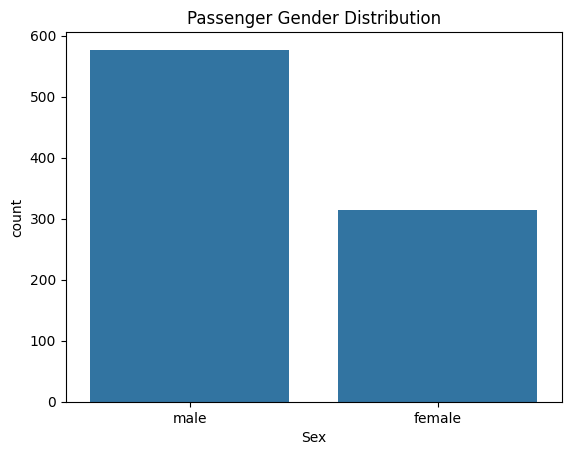

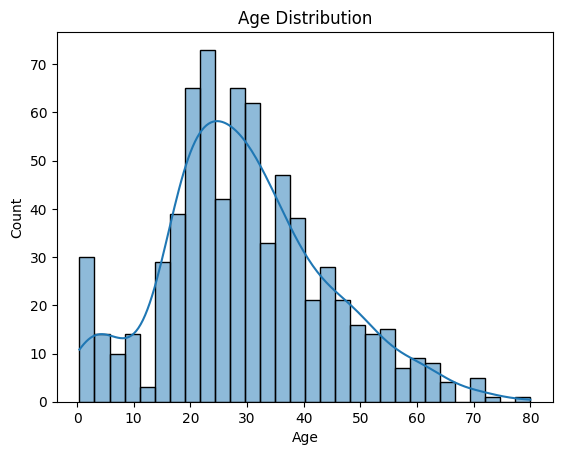

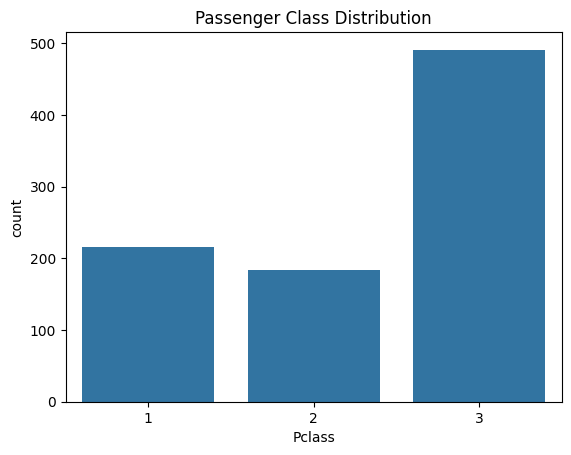

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
sns.countplot(data=df, x='Sex')
plt.title("Passenger Gender Distribution")
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Class distribution
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()


In [5]:
# Survival by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:\n", survival_by_gender)

# Survival by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:\n", survival_by_class)

# Survival by age group (minors vs adults)
df['is_minor'] = df['Age'] < 18
survival_by_age_group = df.groupby('is_minor')['Survived'].mean()
print("\nSurvival Rate by Age Group (Minors vs Adults):\n", survival_by_age_group)


Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Age Group (Minors vs Adults):
 is_minor
False    0.361183
True     0.539823
Name: Survived, dtype: float64


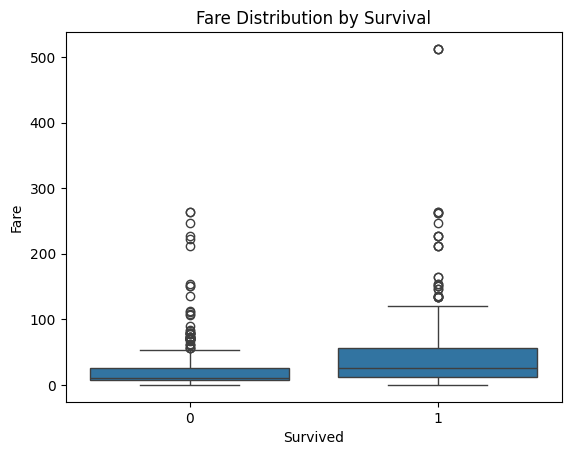

Correlation between Fare and Survival: 0.2573065223849626


In [6]:
# Boxplot: Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

# Correlation between fare and survival
fare_survival_corr = df[['Fare', 'Survived']].corr().iloc[0,1]
print("Correlation between Fare and Survival:", fare_survival_corr)


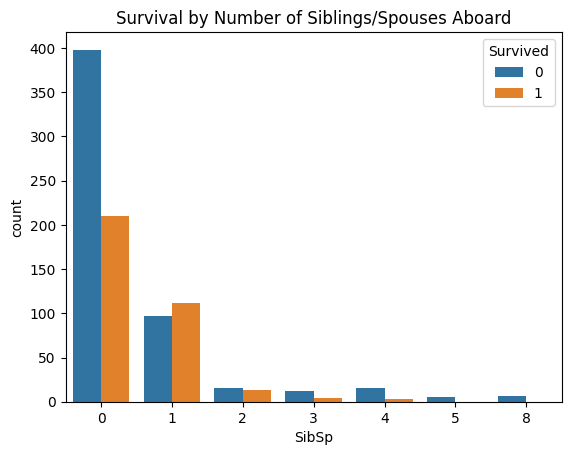

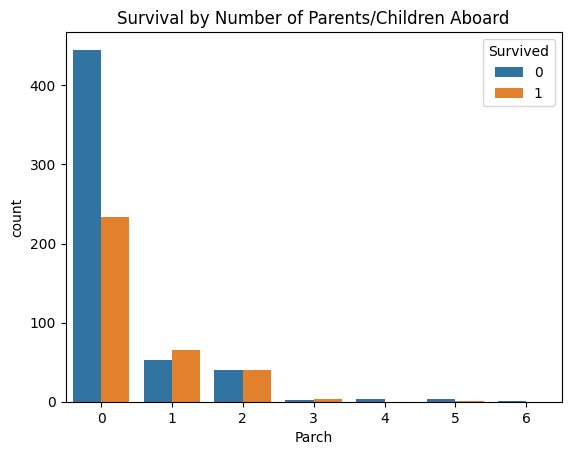

In [7]:
# Analyze siblings/spouses aboard
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title("Survival by Number of Siblings/Spouses Aboard")
plt.show()

# Analyze parents/children aboard
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title("Survival by Number of Parents/Children Aboard")
plt.show()


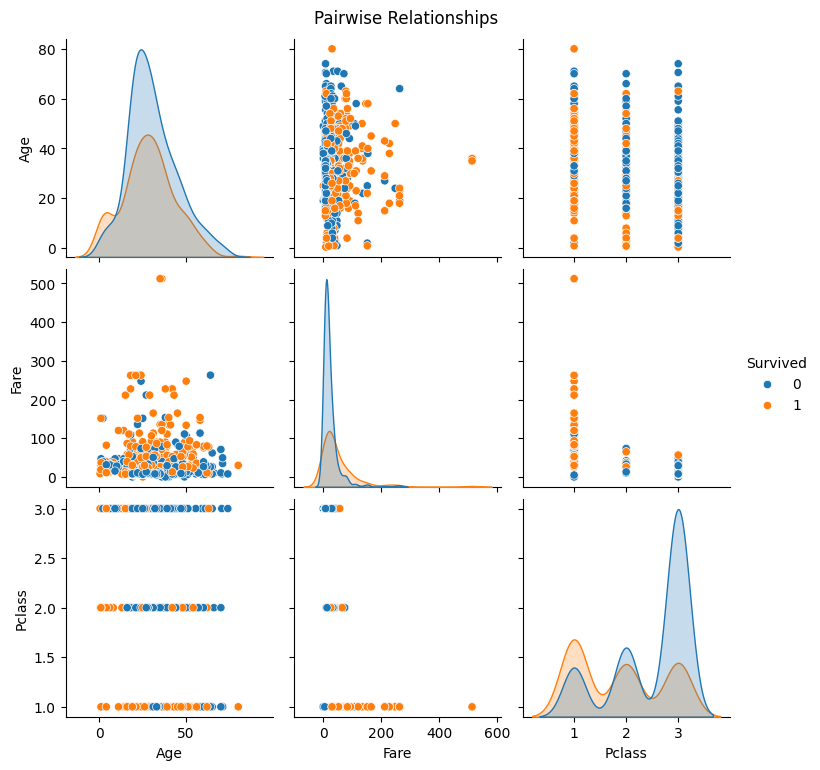

In [8]:
# Import seaborn and prepare pairplot
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NA values for selected features
selected_cols = ['Age', 'Fare', 'Pclass', 'Survived']
df_clean = df[selected_cols].dropna()

# Create pairplot
sns.pairplot(df_clean, hue='Survived')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [9]:
# Missing value summary
print("Missing values per column:")
print(df.isnull().sum())

# Percentage missing
missing_percentage = df.isnull().mean().round(4) * 100
print("\nPercentage missing:")
print(missing_percentage)

# Decision hint
print("\nRecommendation:")
print("- 'cabin' has too many missing values → consider dropping it.")
print("- 'embarked' and 'age' → consider filling or imputing.")


#test


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
is_minor         0
dtype: int64

Percentage missing:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
is_minor        0.00
dtype: float64

Recommendation:
- 'cabin' has too many missing values → consider dropping it.
- 'embarked' and 'age' → consider filling or imputing.
